# Manufacturing Process Modelling and Optimization

## Necessary Packages

In [3]:
import numpy as np
import pandas as pd 
import sklearn
from sklearn import datasets
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor as RF
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

## Data

In [4]:
df_feed = pd.read_csv('Feed.csv', parse_dates = ['TimeStamp'], encoding = 'utf-8')
df_feed.head(10)

,TimeStamp,Pol,IS,Moisture,Ash,Filterability,Color,Alcohol_Floc
0,2021-01-01 07:00:00,99.114000,0.235400,0.249200,0.266700,66.130000,2228.900000,90.3000
1,2021-01-02 07:00:00,99.114000,0.235400,0.249200,0.266700,66.130000,2228.900000,90.3000
2,2021-01-03 07:00:00,99.114000,0.235400,0.249200,0.266700,66.130000,2228.900000,90.3000
3,2021-01-04 07:00:00,98.893000,0.327800,0.427800,0.282700,57.690000,2038.100000,75.5000
4,2021-01-05 07:00:00,98.893000,0.327800,0.427800,0.282700,57.690000,2038.100000,75.5000
5,2021-01-06 07:00:00,98.893000,0.327800,0.427800,0.282700,57.690000,2038.100000,75.5000
6,2021-01-07 07:00:00,98.893000,0.327800,0.427800,0.282700,57.690000,2038.100000,75.5000
7,2021-01-08 07:00:00,98.893000,0.327800,0.427800,0.282700,57.690000,2038.100000,75.5000
8,2021-01-09 07:00:00,98.951941,0.296648,0.378957,0.276723,60.802717,2077.568825,80.1287
9,2021-01-10 07:00:00,99.011059,0.265402,0.329968,0.270727,63.924782,2117.156175,84.7713


In [5]:
df_operation = pd.read_csv('operation.csv', parse_dates = ['TimeStamp'], encoding = 'utf-8')
df_operation.head()

,TimeStamp,MELTER.MELTER_CONTROL_BX.Value,MELTER_ML.TEMP_PV_Value,CO2.CO2_GAS_concentration_Value,CO2.CO2_GAS_F.Value,CO2.CO2_GAS_PRESS.Value,SATURATOR1_PH_PV.Value,SATURATOR1_ST_TEMP.Value,SATURATOR1_CALCIUM_F.Value,SATURATOR2_PH_PV.Value,SATURATOR2_ST_TEMP.Value,SATURATOR2_CALCIUM_F.Value,SATURATOR3_PH_PV.Value,SATURATOR3_ST_TEMP.Value,SATURATOR1_RATE_SV.Value,SATURATOR_ML_SUPPLY_F_PV.Value
0,2021-01-01 00:00:00,63.448363,77.699253,10.039473,120.764633,0.470004,9.037534,72.150647,1007.013333,9.550162,76.638577,734.302733,8.592564,71.70983,0.7,86.638207
1,2021-01-01 00:15:00,64.030790,79.073980,10.205610,121.011800,0.465029,8.942631,71.575940,1005.097000,9.513694,76.511600,710.012300,8.405455,71.66605,0.7,87.972490
2,2021-01-01 00:30:00,63.195320,75.847690,10.777940,118.144600,0.478512,9.062612,73.271210,1011.029000,9.598305,76.657850,772.364900,8.686612,71.77036,0.7,87.943160
3,2021-01-01 00:45:00,64.138490,78.790680,10.759530,120.771600,0.466630,9.067875,71.579910,1010.474000,9.503764,76.628050,731.212400,8.714812,71.76398,0.7,88.276100
4,2021-01-01 01:00:00,62.949850,76.085950,10.137400,117.304500,0.478880,9.000519,73.547160,1004.443000,9.612913,76.502850,844.652600,8.441973,71.62117,0.7,87.646890


In [6]:
df_mes = pd.read_csv('MES.csv', parse_dates = ['TimeStamp'], encoding = 'utf-8')
df_mes.head()

,TimeStamp,Saturator1_exp_CaO,Saturator2_exp_CaO,Saturator3_exp_CaO
0,2021-01-01 09:00:00,590.0,2696.0,759.0
1,2021-01-02 09:00:00,507.0,2507.0,1684.0
2,2021-01-03 09:00:00,696.0,862.0,483.0
3,2021-01-04 09:00:00,543.0,1635.0,684.0
4,2021-01-05 09:00:00,445.0,1449.0,657.0


In [7]:
df_feed.set_index('TimeStamp', inplace= True)
df_operation.set_index('TimeStamp', inplace= True)
df_mes.set_index('TimeStamp', inplace= True)

df_feed.head(5)

,Pol,IS,Moisture,Ash,Filterability,Color,Alcohol_Floc
TimeStamp,,,,,,,
2021-01-01 07:00:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3
2021-01-02 07:00:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3
2021-01-03 07:00:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3
2021-01-04 07:00:00,98.893,0.3278,0.4278,0.2827,57.69,2038.1,75.5
2021-01-05 07:00:00,98.893,0.3278,0.4278,0.2827,57.69,2038.1,75.5


In [8]:
df = df_operation.join(df_feed)[[i for i in df_feed.columns] + [i for i in df_operation.columns]]
df.head()

,Pol,IS,Moisture,Ash,Filterability,Color,Alcohol_Floc,MELTER.MELTER_CONTROL_BX.Value,MELTER_ML.TEMP_PV_Value,CO2.CO2_GAS_concentration_Value,...,SATURATOR1_PH_PV.Value,SATURATOR1_ST_TEMP.Value,SATURATOR1_CALCIUM_F.Value,SATURATOR2_PH_PV.Value,SATURATOR2_ST_TEMP.Value,SATURATOR2_CALCIUM_F.Value,SATURATOR3_PH_PV.Value,SATURATOR3_ST_TEMP.Value,SATURATOR1_RATE_SV.Value,SATURATOR_ML_SUPPLY_F_PV.Value
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.448363,77.699253,10.039473,...,9.037534,72.150647,1007.013333,9.550162,76.638577,734.302733,8.592564,71.70983,0.7,86.638207
2021-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.030790,79.073980,10.205610,...,8.942631,71.575940,1005.097000,9.513694,76.511600,710.012300,8.405455,71.66605,0.7,87.972490
2021-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.195320,75.847690,10.777940,...,9.062612,73.271210,1011.029000,9.598305,76.657850,772.364900,8.686612,71.77036,0.7,87.943160
2021-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.138490,78.790680,10.759530,...,9.067875,71.579910,1010.474000,9.503764,76.628050,731.212400,8.714812,71.76398,0.7,88.276100
2021-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.949850,76.085950,10.137400,...,9.000519,73.547160,1004.443000,9.612913,76.502850,844.652600,8.441973,71.62117,0.7,87.646890


In [9]:
df = df.join(df_mes)
df.head()

,Pol,IS,Moisture,Ash,Filterability,Color,Alcohol_Floc,MELTER.MELTER_CONTROL_BX.Value,MELTER_ML.TEMP_PV_Value,CO2.CO2_GAS_concentration_Value,...,SATURATOR2_PH_PV.Value,SATURATOR2_ST_TEMP.Value,SATURATOR2_CALCIUM_F.Value,SATURATOR3_PH_PV.Value,SATURATOR3_ST_TEMP.Value,SATURATOR1_RATE_SV.Value,SATURATOR_ML_SUPPLY_F_PV.Value,Saturator1_exp_CaO,Saturator2_exp_CaO,Saturator3_exp_CaO
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.448363,77.699253,10.039473,...,9.550162,76.638577,734.302733,8.592564,71.70983,0.7,86.638207,NaN,NaN,NaN
2021-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.030790,79.073980,10.205610,...,9.513694,76.511600,710.012300,8.405455,71.66605,0.7,87.972490,NaN,NaN,NaN
2021-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.195320,75.847690,10.777940,...,9.598305,76.657850,772.364900,8.686612,71.77036,0.7,87.943160,NaN,NaN,NaN
2021-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.138490,78.790680,10.759530,...,9.503764,76.628050,731.212400,8.714812,71.76398,0.7,88.276100,NaN,NaN,NaN
2021-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.949850,76.085950,10.137400,...,9.612913,76.502850,844.652600,8.441973,71.62117,0.7,87.646890,NaN,NaN,NaN


In [10]:
df = df.reset_index()
df.loc[:, df_feed.columns] = df[df_feed.columns].fillna(method = 'ffill')
df.loc[:, df_mes.columns] = df[df_mes.columns].fillna(method = 'ffill')
df.head()

,TimeStamp,Pol,IS,Moisture,Ash,Filterability,Color,Alcohol_Floc,MELTER.MELTER_CONTROL_BX.Value,MELTER_ML.TEMP_PV_Value,...,SATURATOR2_PH_PV.Value,SATURATOR2_ST_TEMP.Value,SATURATOR2_CALCIUM_F.Value,SATURATOR3_PH_PV.Value,SATURATOR3_ST_TEMP.Value,SATURATOR1_RATE_SV.Value,SATURATOR_ML_SUPPLY_F_PV.Value,Saturator1_exp_CaO,Saturator2_exp_CaO,Saturator3_exp_CaO
0,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.448363,77.699253,...,9.550162,76.638577,734.302733,8.592564,71.70983,0.7,86.638207,NaN,NaN,NaN
1,2021-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.030790,79.073980,...,9.513694,76.511600,710.012300,8.405455,71.66605,0.7,87.972490,NaN,NaN,NaN
2,2021-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.195320,75.847690,...,9.598305,76.657850,772.364900,8.686612,71.77036,0.7,87.943160,NaN,NaN,NaN
3,2021-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.138490,78.790680,...,9.503764,76.628050,731.212400,8.714812,71.76398,0.7,88.276100,NaN,NaN,NaN
4,2021-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.949850,76.085950,...,9.612913,76.502850,844.652600,8.441973,71.62117,0.7,87.646890,NaN,NaN,NaN


In [11]:
Feed_columns = [i for i in df_feed.columns]
Melter_columns =  [i for i in df.columns if 'MELTER' in i]
Saturator_columns = [i for i in df.columns if i not in Feed_columns + Melter_columns]

print('Feed_columns: ', Feed_columns)
print('Melter columns: ', Melter_columns)
print('Saturator_columns: ', Saturator_columns)

Feed_columns:  ['Pol', 'IS', 'Moisture', 'Ash', 'Filterability', 'Color', 'Alcohol_Floc']
Melter columns:  ['MELTER.MELTER_CONTROL_BX.Value', 'MELTER_ML.TEMP_PV_Value']
Saturator_columns:  ['TimeStamp', 'CO2.CO2_GAS_concentration_Value', 'CO2.CO2_GAS_F.Value', 'CO2.CO2_GAS_PRESS.Value', 'SATURATOR1_PH_PV.Value', 'SATURATOR1_ST_TEMP.Value', 'SATURATOR1_CALCIUM_F.Value', 'SATURATOR2_PH_PV.Value', 'SATURATOR2_ST_TEMP.Value', 'SATURATOR2_CALCIUM_F.Value', 'SATURATOR3_PH_PV.Value', 'SATURATOR3_ST_TEMP.Value', 'SATURATOR1_RATE_SV.Value', 'SATURATOR_ML_SUPPLY_F_PV.Value', 'Saturator1_exp_CaO', 'Saturator2_exp_CaO', 'Saturator3_exp_CaO']


In [12]:
df[Feed_columns] = df[Feed_columns].shift(6) # 15min * 6 => 90min
df[Melter_columns] = df[Melter_columns].shift(4) # 15 * 4 => 60 min

In [13]:
def Null_outlier(df):
  temp_df = df.copy()
  for i in df.columns:
    temp_df.loc[temp_df[i].isnull() == True, 'outlier'] = 1
    temp_df.loc[temp_df[i] == 0, 'outlier'] = 1

  temp_df = temp_df[temp_df['outlier'] != 1]
  return temp_df.drop(columns = ['outlier']).reset_index(drop = True)

df = Null_outlier(df)
df.head(10)

,TimeStamp,Pol,IS,Moisture,Ash,Filterability,Color,Alcohol_Floc,MELTER.MELTER_CONTROL_BX.Value,MELTER_ML.TEMP_PV_Value,...,SATURATOR2_PH_PV.Value,SATURATOR2_ST_TEMP.Value,SATURATOR2_CALCIUM_F.Value,SATURATOR3_PH_PV.Value,SATURATOR3_ST_TEMP.Value,SATURATOR1_RATE_SV.Value,SATURATOR_ML_SUPPLY_F_PV.Value,Saturator1_exp_CaO,Saturator2_exp_CaO,Saturator3_exp_CaO
0,2021-01-01 09:00:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,63.562060,76.239470,...,9.603174,77.172820,696.810400,8.303131,72.203200,0.7,85.987560,590.0,2696.0,759.0
1,2021-01-01 09:15:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,64.515840,79.042880,...,9.532428,77.075265,581.929035,8.422064,72.149195,0.7,86.024865,590.0,2696.0,759.0
2,2021-01-01 09:30:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,63.606615,77.849540,...,9.533872,77.047499,633.842855,8.450684,72.073897,0.7,85.275926,590.0,2696.0,759.0
3,2021-01-01 09:45:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,64.168590,79.697660,...,9.535317,77.019733,685.756675,8.479305,71.998600,0.7,84.526988,590.0,2696.0,759.0
4,2021-01-01 10:00:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,63.127450,76.063430,...,9.530415,76.964531,727.617113,8.486639,71.892728,0.7,84.761121,590.0,2696.0,759.0
5,2021-01-01 10:15:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,63.485220,77.728110,...,9.525512,76.909330,769.477550,8.493973,71.786855,0.7,84.995255,590.0,2696.0,759.0
6,2021-01-01 10:30:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,63.563784,77.727001,...,9.522979,76.913200,717.864050,8.504443,71.822653,0.7,85.489393,590.0,2696.0,759.0
7,2021-01-01 10:45:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,63.642347,77.725893,...,9.520444,76.917070,666.250550,8.514914,71.858450,0.7,85.983530,590.0,2696.0,759.0
8,2021-01-01 11:00:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,63.669919,77.762126,...,9.445089,76.925770,581.431500,8.617624,71.896320,0.7,85.944290,590.0,2696.0,759.0
9,2021-01-01 11:15:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,63.697490,77.798360,...,9.606206,76.955860,793.634950,8.496347,71.976875,0.7,85.944825,590.0,2696.0,759.0


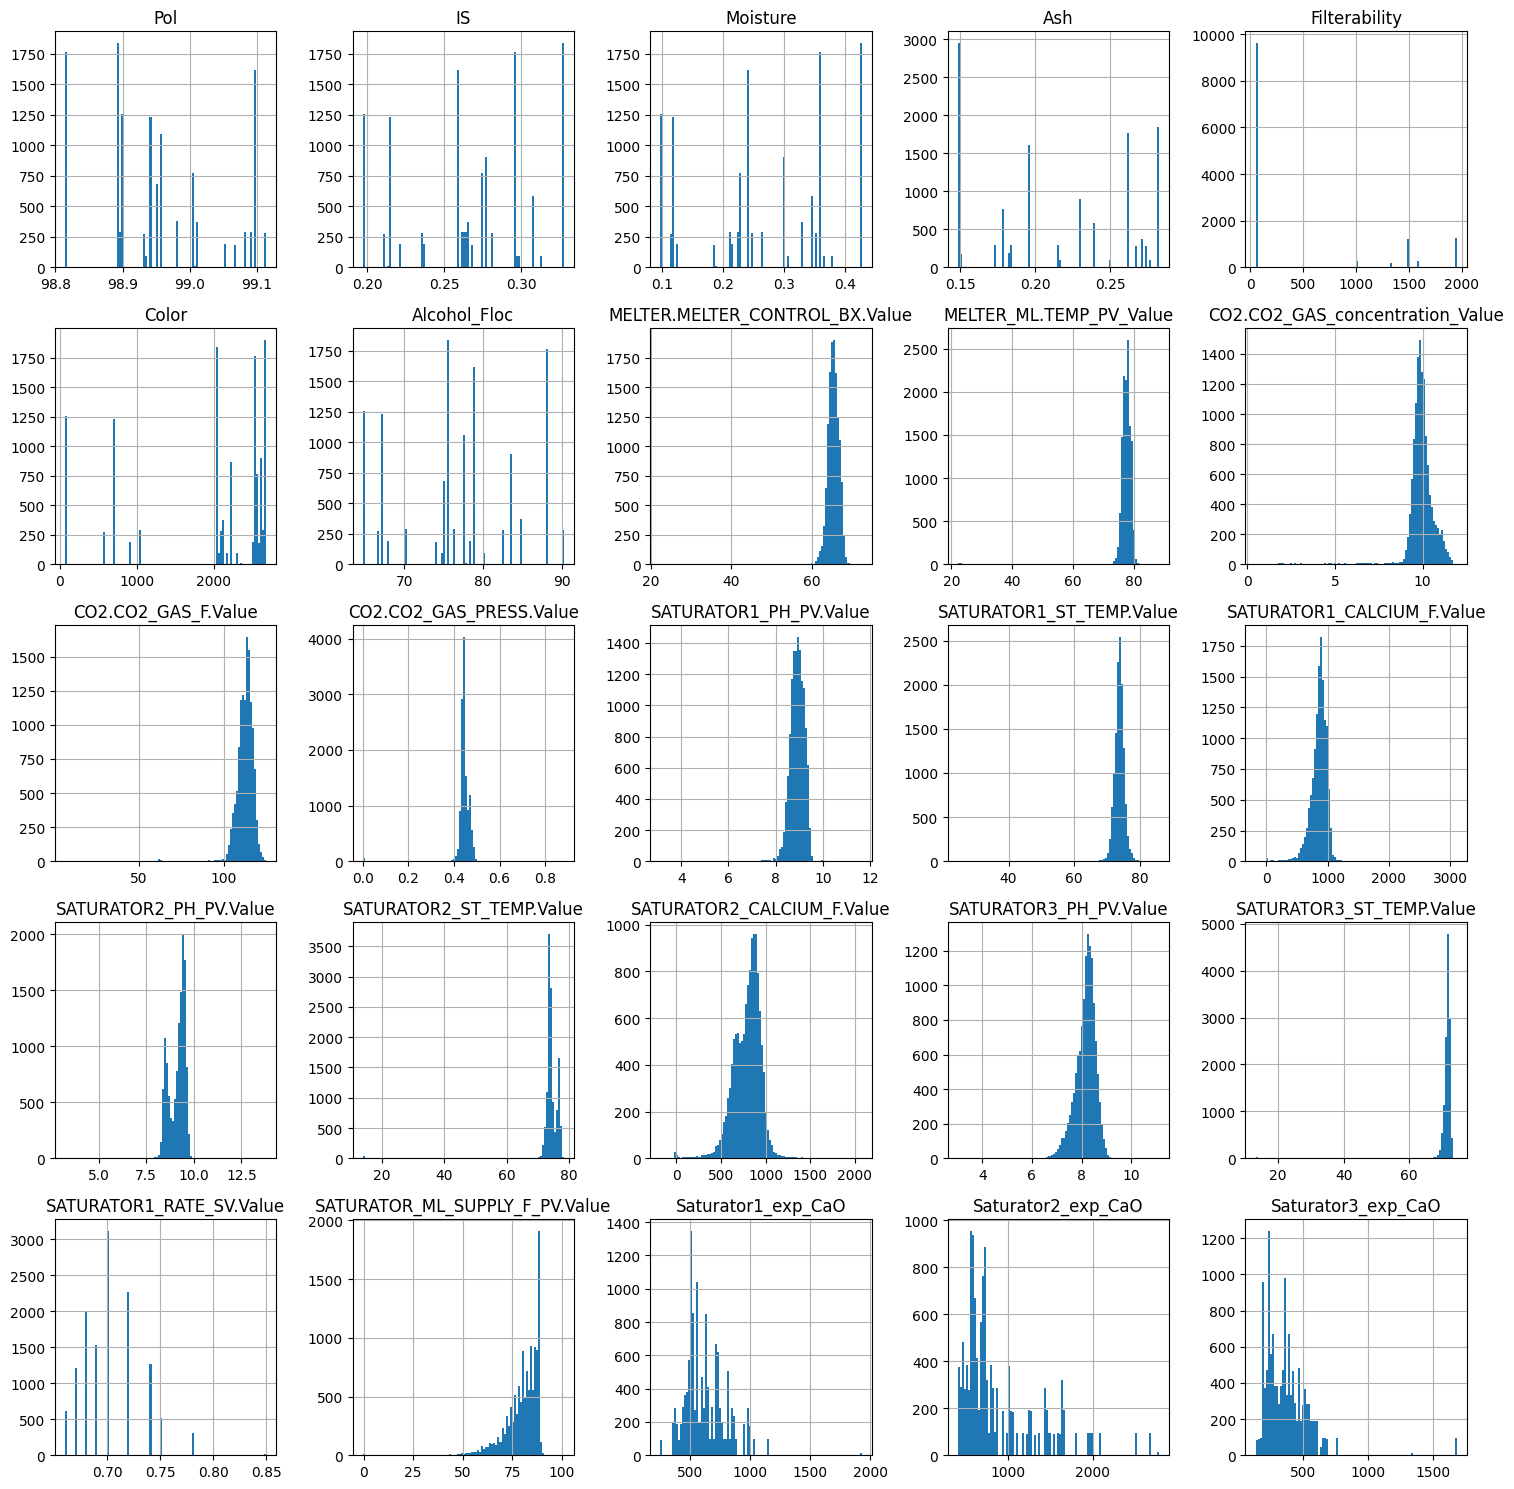

In [14]:
def hist_plot(df):
  show_col_list = [i for i in df.columns if i != 'TimeStamp']
  df[show_col_list].hist(figsize = (15,15), bins = 100)
  plt.tight_layout()
  plt.show()

hist_plot(df)

In [15]:
def std_outlier(df, target_column_list, stdNUM):
  temp_df = df.copy()
  for t in target_column_list:
    
    mean = np.mean(temp_df[t])
    std = np.std(temp_df[t])
    lower_bound = mean - stdNUM * std
    upper_bound = mean + stdNUM * std

    low_index = list(temp_df[temp_df[t] < lower_bound].index)
    high_index = list(temp_df[temp_df[t] > upper_bound].index)

    outlierIndex_list = sorted(low_index + high_index)

    temp_df.loc[outlierIndex_list,'outlier'] = 1

  temp_df = temp_df[temp_df['outlier'] != 1]

  return temp_df.drop(columns = ['outlier']).reset_index(drop = True)

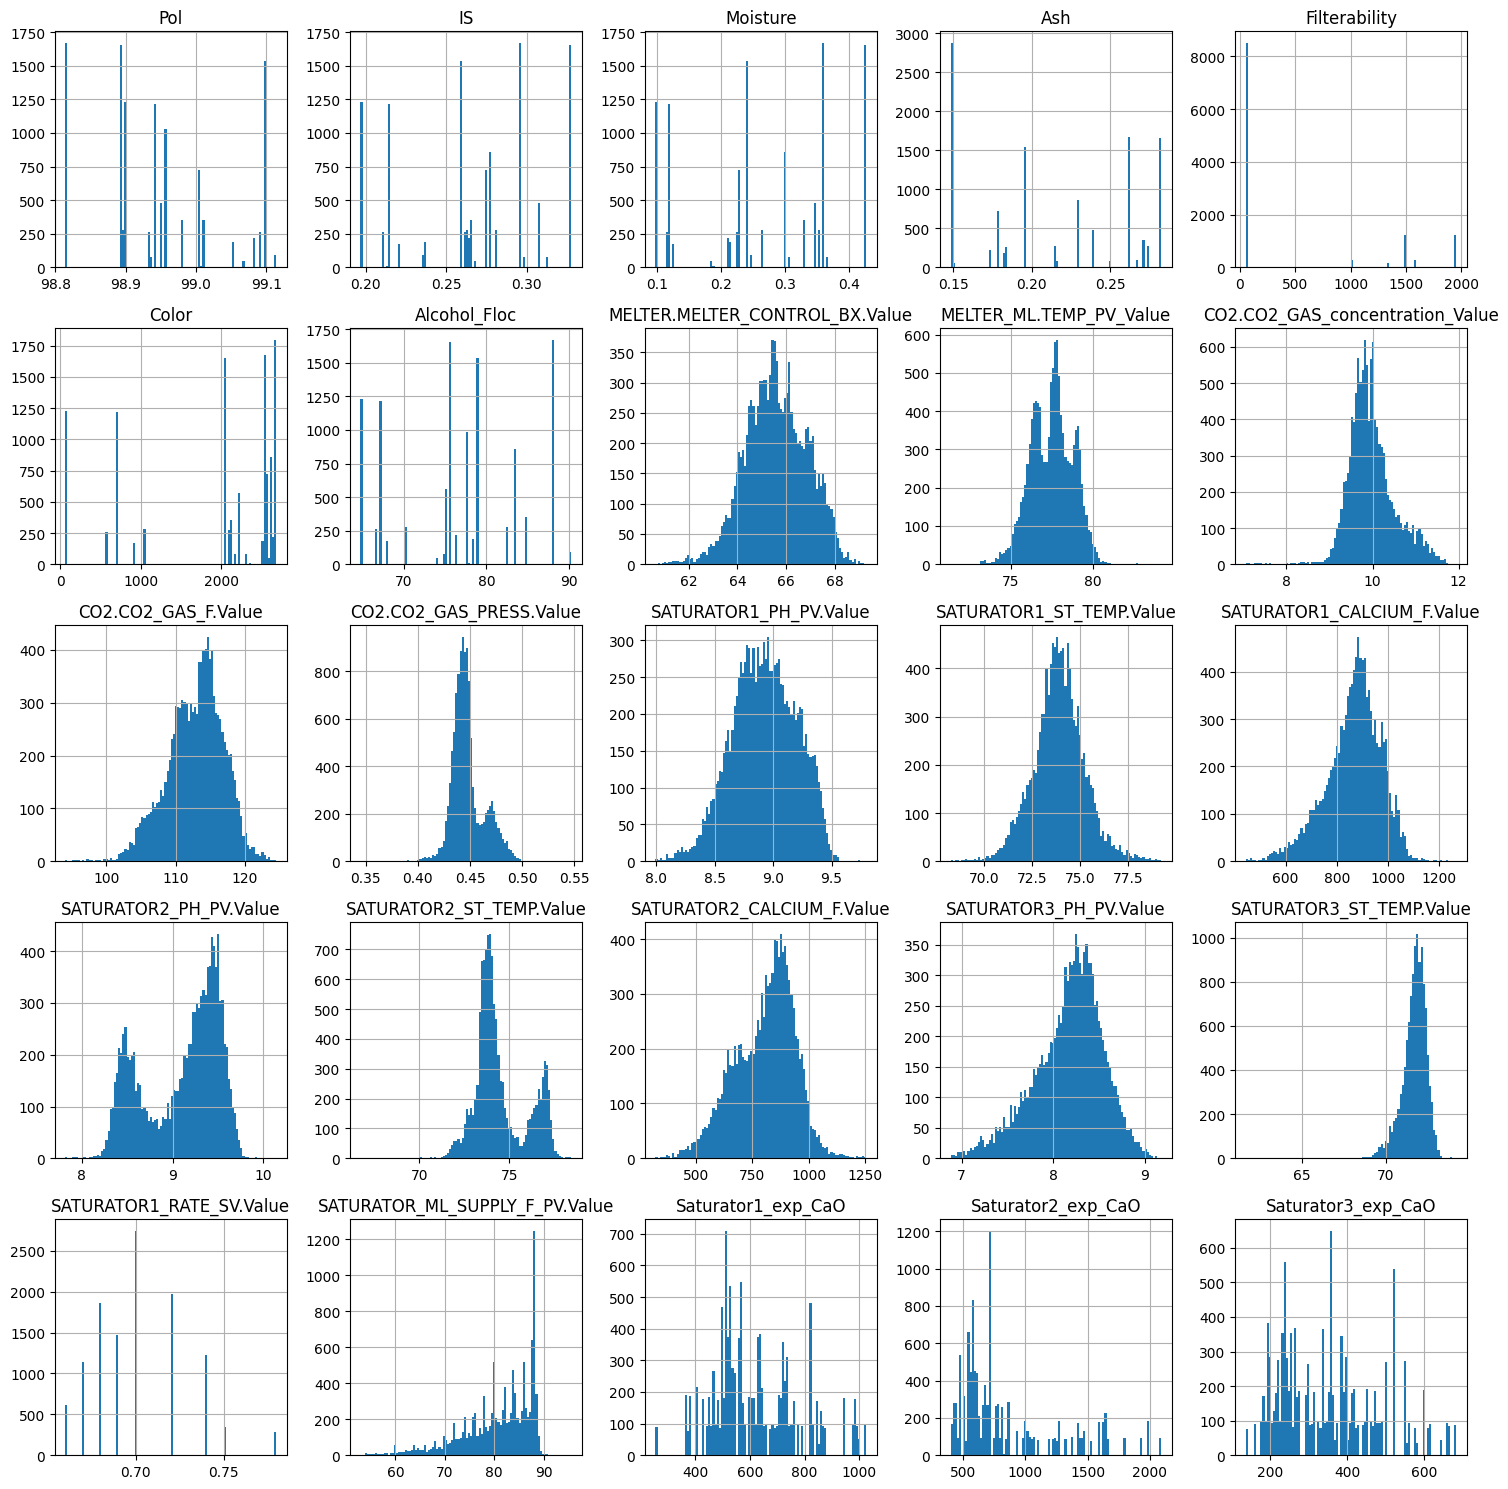

In [16]:
target_col_list = [i for i in df.columns if i != 'TimeStamp']
df = std_outlier(df, target_col_list, 3)
hist_plot(df)

In [17]:
df_ratio = (0.8, 0.1, 0.1)
train_df = df.iloc[:int(len(df) * df_ratio[0])]
val_df = df.iloc[int(len(df) * df_ratio[0]): int(len(df) * df_ratio[0] + len(df) * df_ratio[1])]
test_df = df.iloc[int(len(df) * df_ratio[0] + len(df) * df_ratio[1]):]

print(f'train_size: {len(train_df)}, validation_size: {len(val_df)}, test_size: {len(test_df)}')

train_size: 9345, validation_size: 1168, test_size: 1169


In [18]:
target_y = 'SATURATOR_ML_SUPPLY_F_PV.Value'
x_col = [i for i in train_df.columns if i not in ['TimeStamp', target_y]]
y_col = [target_y]
train_X, val_X, test_X = train_df[x_col], val_df[x_col], test_df[x_col]
train_y, val_y, test_y = train_df[y_col], val_df[y_col], test_df[y_col]

In [19]:
train_df.head()

,TimeStamp,Pol,IS,Moisture,Ash,Filterability,Color,Alcohol_Floc,MELTER.MELTER_CONTROL_BX.Value,MELTER_ML.TEMP_PV_Value,...,SATURATOR2_PH_PV.Value,SATURATOR2_ST_TEMP.Value,SATURATOR2_CALCIUM_F.Value,SATURATOR3_PH_PV.Value,SATURATOR3_ST_TEMP.Value,SATURATOR1_RATE_SV.Value,SATURATOR_ML_SUPPLY_F_PV.Value,Saturator1_exp_CaO,Saturator2_exp_CaO,Saturator3_exp_CaO
0,2021-01-03 09:00:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,64.700580,79.453800,...,9.562682,76.66763,531.3416,8.074342,70.84587,0.7,73.993840,696.0,862.0,483.0
1,2021-01-03 09:15:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,63.687530,76.566800,...,9.362047,76.68493,542.3568,8.249978,70.82645,0.7,73.835850,696.0,862.0,483.0
2,2021-01-03 09:30:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,64.316655,78.141315,...,9.464526,76.72855,666.8544,8.425686,71.05424,0.7,82.185395,696.0,862.0,483.0
3,2021-01-03 09:45:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,64.516190,76.423870,...,9.573341,76.80528,540.4653,8.533955,71.17601,0.7,73.663790,696.0,862.0,483.0
4,2021-01-03 10:00:00,99.114,0.2354,0.2492,0.2667,66.13,2228.9,90.3,63.584030,79.264530,...,9.566264,76.78041,381.1177,8.270624,71.07713,0.7,75.123480,696.0,862.0,483.0


In [20]:
val_df.head()

,TimeStamp,Pol,IS,Moisture,Ash,Filterability,Color,Alcohol_Floc,MELTER.MELTER_CONTROL_BX.Value,MELTER_ML.TEMP_PV_Value,...,SATURATOR2_PH_PV.Value,SATURATOR2_ST_TEMP.Value,SATURATOR2_CALCIUM_F.Value,SATURATOR3_PH_PV.Value,SATURATOR3_ST_TEMP.Value,SATURATOR1_RATE_SV.Value,SATURATOR_ML_SUPPLY_F_PV.Value,Saturator1_exp_CaO,Saturator2_exp_CaO,Saturator3_exp_CaO
9345,2021-05-05 01:15:00,98.956429,0.2775,0.300643,0.229,61.685714,2607.0,83.5,66.406730,75.405820,...,8.523234,71.73804,804.043800,8.127025,69.340190,0.68,69.87504,514.0,566.0,278.0
9346,2021-05-05 01:30:00,98.956429,0.2775,0.300643,0.229,61.685714,2607.0,83.5,68.022280,74.446130,...,8.364925,72.04832,733.815100,7.534037,69.575790,0.68,72.28896,514.0,566.0,278.0
9347,2021-05-05 01:45:00,98.956429,0.2775,0.300643,0.229,61.685714,2607.0,83.5,67.004865,75.793390,...,8.382909,72.15736,765.691167,7.734400,69.739443,0.68,75.67305,514.0,566.0,278.0
9348,2021-05-05 02:00:00,98.956429,0.2775,0.300643,0.229,61.685714,2607.0,83.5,66.458313,75.170195,...,8.443906,72.35440,810.188833,7.996591,70.021302,0.68,76.95705,514.0,566.0,278.0
9349,2021-05-05 02:15:00,98.956429,0.2775,0.300643,0.229,61.685714,2607.0,83.5,65.911760,74.547000,...,8.504902,72.55144,854.686500,8.258782,70.303160,0.68,78.24105,514.0,566.0,278.0


In [21]:
test_df.head()

,TimeStamp,Pol,IS,Moisture,Ash,Filterability,Color,Alcohol_Floc,MELTER.MELTER_CONTROL_BX.Value,MELTER_ML.TEMP_PV_Value,...,SATURATOR2_PH_PV.Value,SATURATOR2_ST_TEMP.Value,SATURATOR2_CALCIUM_F.Value,SATURATOR3_PH_PV.Value,SATURATOR3_ST_TEMP.Value,SATURATOR1_RATE_SV.Value,SATURATOR_ML_SUPPLY_F_PV.Value,Saturator1_exp_CaO,Saturator2_exp_CaO,Saturator3_exp_CaO
10513,2021-05-18 15:15:00,99.098571,0.259143,0.239571,0.195857,61.057143,2683.857143,78.8,66.926695,76.793975,...,8.921938,74.152790,851.627400,7.944473,71.635350,0.7,65.059570,634.0,578.0,254.0
10514,2021-05-18 15:30:00,99.098571,0.259143,0.239571,0.195857,61.057143,2683.857143,78.8,67.795640,75.140560,...,8.849728,74.176180,734.754825,7.818369,71.627117,0.7,64.508653,634.0,578.0,254.0
10515,2021-05-18 15:45:00,99.098571,0.259143,0.239571,0.195857,61.057143,2683.857143,78.8,66.923665,76.721810,...,8.777517,74.199570,617.882250,7.692265,71.618885,0.7,63.957735,634.0,578.0,254.0
10516,2021-05-18 16:00:00,99.098571,0.259143,0.239571,0.195857,61.057143,2683.857143,78.8,66.032980,78.414730,...,8.838333,74.141460,692.668800,8.033428,71.584440,0.7,64.809200,634.0,578.0,254.0
10517,2021-05-18 16:15:00,99.098571,0.259143,0.239571,0.195857,61.057143,2683.857143,78.8,67.883380,75.377460,...,8.819367,74.099865,468.000800,7.756770,71.537730,0.7,63.949710,634.0,578.0,254.0


In [22]:
train_df.describe()

,Pol,IS,Moisture,Ash,Filterability,Color,Alcohol_Floc,MELTER.MELTER_CONTROL_BX.Value,MELTER_ML.TEMP_PV_Value,CO2.CO2_GAS_concentration_Value,...,SATURATOR2_PH_PV.Value,SATURATOR2_ST_TEMP.Value,SATURATOR2_CALCIUM_F.Value,SATURATOR3_PH_PV.Value,SATURATOR3_ST_TEMP.Value,SATURATOR1_RATE_SV.Value,SATURATOR_ML_SUPPLY_F_PV.Value,Saturator1_exp_CaO,Saturator2_exp_CaO,Saturator3_exp_CaO
count,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,...,9345.000000,9345.000000,9345.00000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000
mean,98.926090,0.267296,0.268916,0.216493,589.924937,1713.251621,75.811829,65.336162,77.732338,10.015089,...,9.172289,74.754744,800.21338,8.242858,71.746171,0.703114,81.387361,633.823649,903.347030,377.462921
std,0.071830,0.045385,0.121140,0.054313,759.295714,926.053986,8.079151,1.179531,1.181200,0.549573,...,0.392809,1.452748,138.87467,0.335967,0.777741,0.029169,6.856815,157.757163,420.458761,123.141027
min,98.814286,0.196800,0.097400,0.148400,57.690000,64.510000,64.700000,60.645360,73.849970,7.050201,...,7.840016,66.716070,320.08355,6.880345,61.661090,0.660000,52.946005,254.000000,413.000000,137.000000
25%,98.893000,0.214683,0.119217,0.148967,61.545030,694.049167,67.025000,64.564510,76.802552,9.677457,...,8.886175,73.743657,693.76190,8.058460,71.371770,0.680000,78.003930,514.000000,592.000000,269.000000
50%,98.933333,0.275214,0.300643,0.229000,62.363750,2038.100000,75.500000,65.332950,77.732992,9.954994,...,9.321465,74.264725,826.46000,8.274062,71.852573,0.700000,83.335950,612.000000,720.000000,360.000000
75%,98.956429,0.295857,0.361714,0.266700,1483.416667,2530.142857,83.500000,66.093765,78.677264,10.270957,...,9.474855,76.216645,901.16140,8.463015,72.253100,0.720000,87.091690,736.000000,1104.000000,468.000000
max,99.114000,0.327800,0.427800,0.282700,1954.800000,2683.857143,90.300000,69.286940,84.157400,11.779610,...,10.140380,78.457280,1255.10800,9.179550,74.210095,0.780000,95.576300,1026.000000,2093.000000,684.000000


## Vanilla Model

In [23]:
Input_X = sm.add_constant(train_X)
LR_model = sm.OLS(train_y, Input_X)
LR_results = LR_model.fit()
LR_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     SATURATOR_ML_SUPPLY_F_PV.Value   R-squared:                       0.792
Model:                                        OLS   Adj. R-squared:                  0.791
Method:                             Least Squares   F-statistic:                     1541.
Date:                            Sat, 19 Nov 2022   Prob (F-statistic):               0.00
Time:                                    19:56:36   Log-Likelihood:                -23918.
No. Observations:                            9345   AIC:                         4.788e+04
Df Residuals:                                9321   BIC:                         4.806e+04
Df Model:                                      23                                         
Covariance Type:                        nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.7686      0.508      1.513      0.130      -0.227       1.764
Pol                                -0.0670      0.084     -0.795      0.426      -0.232       0.098
IS                                 34.1916     14.741      2.320      0.020       5.297      63.086
Moisture                          -15.2980     11.388     -1.343      0.179     -37.620       7.024
Ash                                 3.2754     17.762      0.184      0.854     -31.543      38.094
Filterability                       0.0047      0.001      4.239      0.000       0.003       0.007
Color                               0.0024      0.001      2.512      0.012       0.001       0.004
Alcohol_Floc                        0.1222      0.035      3.534      0.000       0.054       0.190
MELTER.MELTER_CONTROL_BX.Value     -0.1718      0.036     -4.741      0.000      -0.243      -0.101
MELTER_ML.TEMP_PV_Value            -0.0850      0.029     -2.939      0.003      -0.142      -0.028
CO2.CO2_GAS_concentration_Value     0.1082      0.071      1.518      0.129      -0.032       0.248
CO2.CO2_GAS_F.Value                -0.1274      0.012    -11.065      0.000      -0.150      -0.105
CO2.CO2_GAS_PRESS.Value            34.1389      3.607      9.464      0.000      27.068      41.210
SATURATOR1_PH_PV.Value             -0.1001      0.182     -0.550      0.582      -0.457       0.256
SATURATOR1_ST_TEMP.Value           -0.1974      0.037     -5.310      0.000      -0.270      -0.125
SATURATOR1_CALCIUM_F.Value          0.0433      0.000     89.594      0.000       0.042       0.044
SATURATOR2_PH_PV.Value             -0.0202      0.197     -0.102      0.918      -0.406       0.366
SATURATOR2_ST_TEMP.Value           -0.8187      0.075    -10.939      0.000      -0.965      -0.672
SATURATOR2_CALCIUM_F.Value          0.0108      0.000     25.261      0.000       0.010       0.012
SATURATOR3_PH_PV.Value              3.2635      0.147     22.265      0.000       2.976       3.551
SATURATOR3_ST_TEMP.Value            1.9350      0.083     23.397      0.000       1.773       2.097
SATURATOR1_RATE_SV.Value          -79.2233      1.872    -42.325      0.000     -82.892     -75.554
Saturator1_exp_CaO                 -0.0009      0.000     -2.895      0.004      -0.001      -0.000
Saturator2_exp_CaO                  0.0006      0.000      2.608      0.009       0.000       0.001
Saturator3_exp_CaO                  0.0033      0.001      5.843      0.000       0.002       0.004
==============================================================================
Omnibus:                     1679.080   Durbin-Watson:                  

In [24]:
def metrics(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    rmse = mean_squared_error(actual, pred) ** 0.5
    mse = mean_squared_error(actual, pred)
    mae = mean_absolute_error(actual, pred)
    print(f'RMSE: {rmse:.4f}, MSE: {mse: .4f}, MAE: {mae: .4f}')

In [25]:
Input_test_X = sm.add_constant(test_X)
pred = LR_results.predict(Input_test_X)

metrics(test_y, pred)


RMSE: 3.1769, MSE:  10.0926, MAE:  2.3442


In [26]:
test_X.set_index(pd.to_datetime(test_df['TimeStamp']), inplace = True)

test_X_res_LR = test_X.copy()
test_X_res_LR['Actual'] = test_y.values
test_X_res_LR['Pred'] = pred.values

def result_plot(df, model_name):
    plt_df = df.copy()
    
    plt.figure(figsize = (15,5), dpi = 100)
    plt.plot(plt_df.index, plt_df['Actual'], label = 'Actual', color = 'red', marker = 'o', linestyle = '-', markersize = 3)
    plt.plot(plt_df.index, plt_df['Pred'], label = 'Prediction', color = 'blue', marker = 'o', linestyle = '-', markersize = 3)
    plt.title(f'{model_name} prediction')
    plt.ylabel('Yield')
    plt.xlabel('Date')
    plt.legend(fontsize = 12, markerscale = 1, loc = 'lower right')
    plt.tight_layout()
    plt.show()

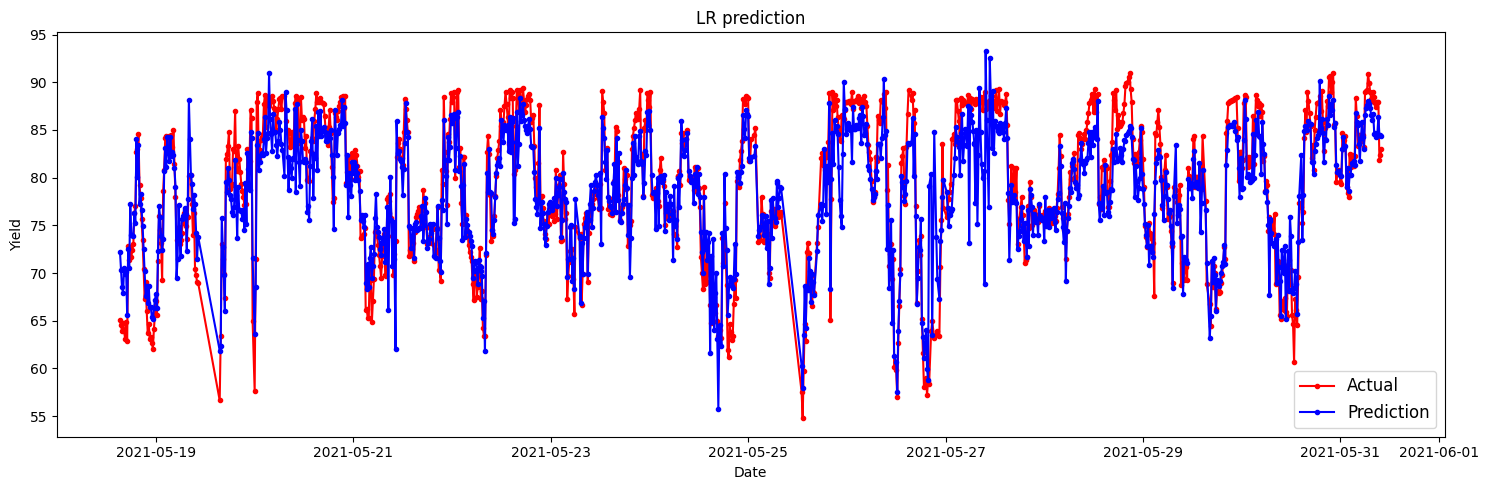

In [27]:
result_plot(test_X_res_LR, 'LR')

## Tree Based Model (Random Forest)

In [28]:
from itertools import product

hyper_param_RF = {'n_estimators': [100, 300, 500],
            'max_depth': [10, 50, 100],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4]}
hp_candidates = []

items = sorted(hyper_param_RF.items())
keys, vals = zip(*items)

for v in product(*vals):
  hp_candidates.append(dict(zip(keys, v)))

print("Length of hyperparameter candidates :", len(hp_candidates))

Length of hyperparameter candidates : 81


In [ ]:
results = []

for candidate_set in hp_candidates:
  temp_model = RF(**candidate_set)
  temp_model.fit(train_X, train_y)
  
  pred = temp_model.predict(val_X)
  metric = mean_squared_error(val_y, pred)
  results.append(list(candidate_set.values()) + [metric])


In [ ]:
results = pd.DataFrame(results, columns = list(keys) + ['MSE Metric'])
results

In [ ]:
results.sort_values(by = 'MSE Metric', ascending = True, inplace = True)
results

In [29]:
# after search for optimal parameters above, we have the following model
RF_model = RF(random_state = 0, n_estimators = 300, min_samples_split = 5, min_samples_leaf = 4, max_depth = 100)
RF_model.fit(train_X, train_y)

RandomForestRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=300, random_state=0)

In [30]:
pred = RF_model.predict(test_X)
metrics(test_y, pred) # performance is a bit less than that of LR_model 

RMSE: 3.3033, MSE:  10.9117, MAE:  2.3611


In [31]:
test_X_res_RF = test_X.copy()
test_X_res_RF['Actual'] = test_y.values
test_X_res_RF['Pred'] = pred

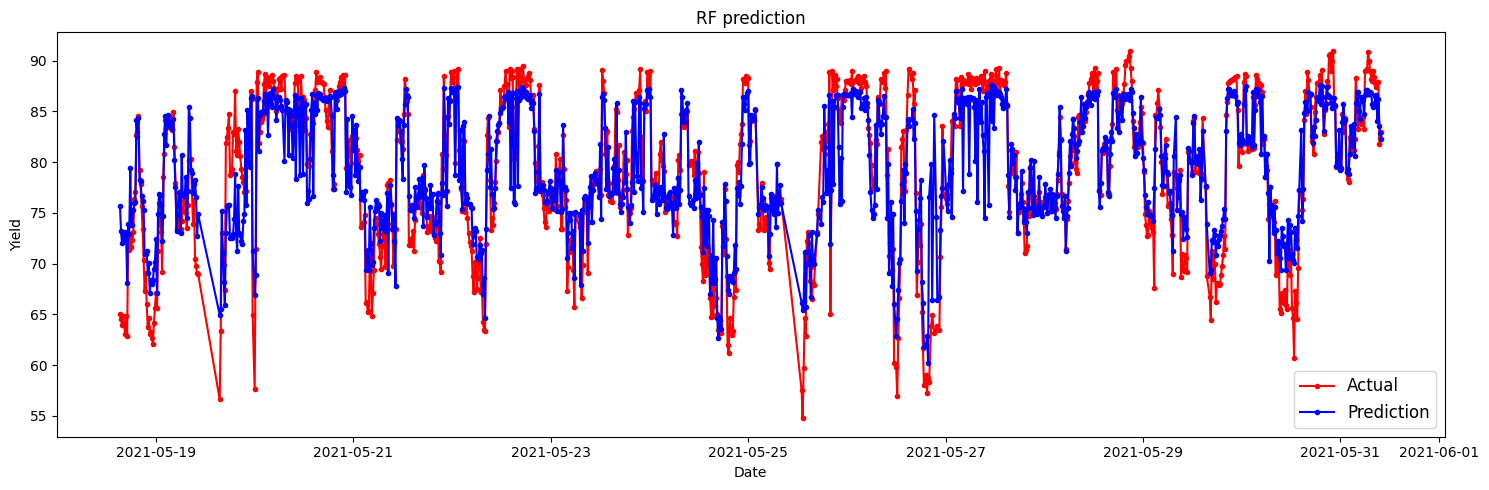

In [32]:
result_plot(test_X_res_RF, 'RF')

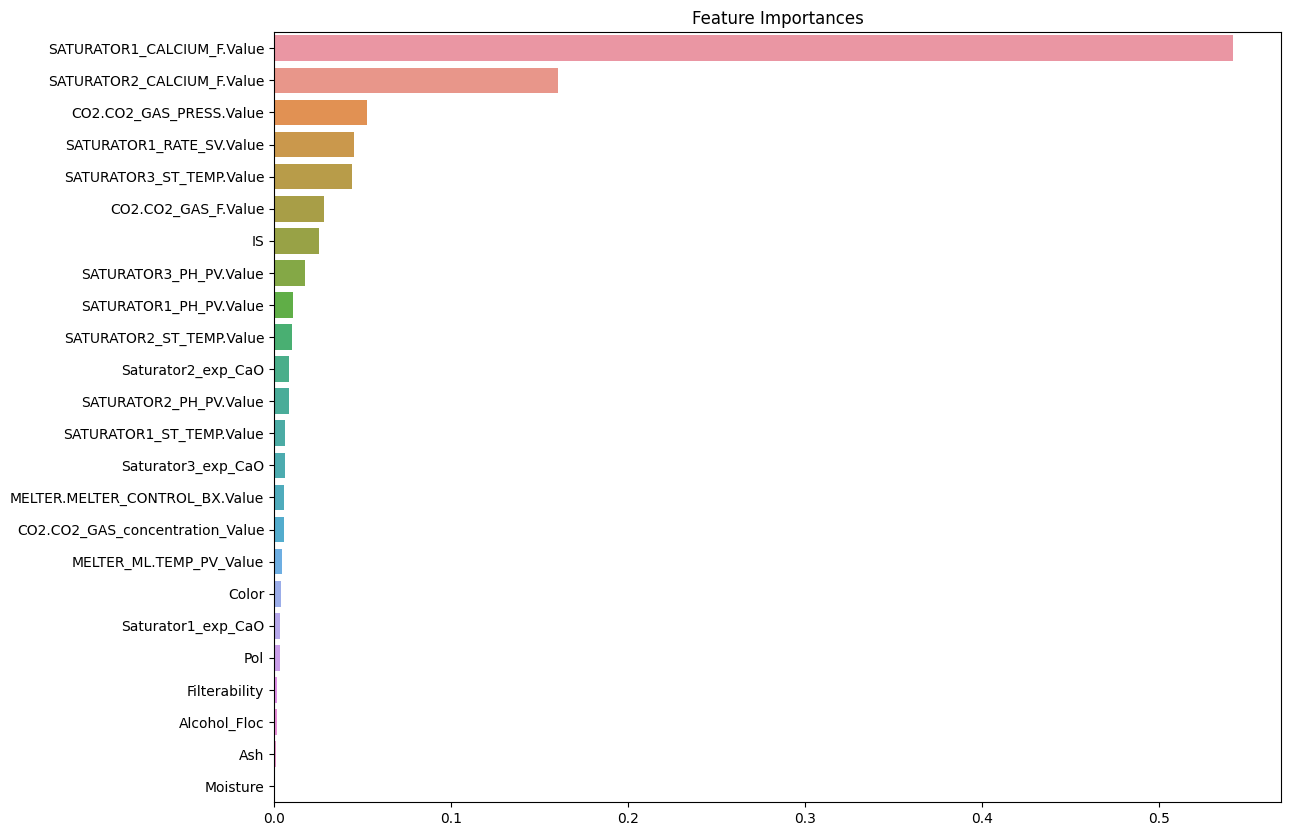

In [33]:
feature_importance = pd.Series(RF_model.feature_importances_, index = train_X.columns).sort_values(ascending=False)
plt.figure(figsize = (13,10))
sns.barplot(x = feature_importance, y = feature_importance.index)
plt.title("Feature Importances")
plt.show()

### Scipy

In [34]:
from scipy.optimize import minimize

In [35]:
def objective_function(x) : 
    x = x[0]
    return 2*(x**5)-4*(x**4)+2*(x**3)-5*(x**2)+2*x+10

initial_input = 1
bound = [0, 2]

minimization = minimize(objective_function, x0 = [initial_input], method = 'Powell', bounds=[bound])
optim_x = minimization.x

print("optimimum x : ", optim_x)
print('optimimum objective : ', objective_function(optim_x))

optimimum x :  [1.57157238]
optimimum objective :  3.330100066051746


In [36]:
"""
Check the weight and bias of Lienar Regression
"""
print('Weights:')
print(LR_results.params[1:])
print('Bias : ', LR_results.params[0])

"""
Make array for the controllable and uncontrollable features
"""
control_col = [
    'MELTER.MELTER_CONTROL_BX.Value', 
    'MELTER_ML.TEMP_PV_Value', 
    'SATURATOR1_ST_TEMP.Value', 
    'SATURATOR2_ST_TEMP.Value', 
]
other_col = [col for col in train_X.columns if col not in control_col]

control_weight, not_weight = np.array(LR_results.params[control_col]), np.array(LR_results.params[other_col])


"""
Set the data point to optimize and the target value of y    
"""
target_data = test_X.iloc[0]
target_value = 75
control_data = np.array(target_data[control_col]).reshape(len(control_weight), 1) 
not_data = np.array(target_data.drop(control_col)).reshape(len(not_weight), 1)

bound = [[50, 80], [60, 90], [50, 100], [50, 100]]

Weights:
Pol                                -0.067025
IS                                 34.191558
Moisture                          -15.297988
Ash                                 3.275431
Filterability                       0.004679
Color                               0.002373
Alcohol_Floc                        0.122211
MELTER.MELTER_CONTROL_BX.Value     -0.171752
MELTER_ML.TEMP_PV_Value            -0.085046
CO2.CO2_GAS_concentration_Value     0.108216
CO2.CO2_GAS_F.Value                -0.127444
CO2.CO2_GAS_PRESS.Value            34.138923
SATURATOR1_PH_PV.Value             -0.100105
SATURATOR1_ST_TEMP.Value           -0.197354
SATURATOR1_CALCIUM_F.Value          0.043251
SATURATOR2_PH_PV.Value             -0.020163
SATURATOR2_ST_TEMP.Value           -0.818717
SATURATOR2_CALCIUM_F.Value          0.010780
SATURATOR3_PH_PV.Value              3.263469
SATURATOR3_ST_TEMP.Value            1.934997
SATURATOR1_RATE_SV.Value          -79.223277
Saturator1_exp_CaO                 -0.000882
S

In [37]:
"""
The class for solving scipy 
You need to implement objective functions
"""
class optimize : 
    def __init__(self, control_data, not_data, control_weight, not_weight, intercept, target) : 
        self.control_data, self.not_data = control_data, not_data
        self.control_weight, self.not_weight = control_weight, not_weight
        self.intercept, self.target = intercept, target
    
    def objective(self, x) : 
        result = np.dot(self.control_weight, x).item()
        result += np.dot(self.not_weight, self.not_data).item()
        result += self.intercept - self.target
        return result ** 2
        
    def solve(self, bound) : 
        sol = minimize(self.objective, self.control_data, method = 'SLSQP', bounds=bound)
        return sol

In [38]:
"""
Run the scipy optimization    
"""
opt = optimize(control_data, not_data, control_weight, not_weight, LR_results.params[0], target_value)
sol = opt.solve(bound)
result_scipy = target_data.copy()
result_scipy[control_col] = sol.x

In [39]:
"""
Printing Result
"""
for c in control_col:
    print('{} | original: {:.5f} | optimal: {:.5f}'.format(c, target_data[c].item(), result_scipy[c].item()))

target_data = np.array(target_data).reshape(1,-1)
constant = np.array([1]).reshape(1,1)
target_data = np.concatenate((constant, target_data), axis = 1)

result_scipy = np.array(result_scipy).reshape(1,-1)
result_scipy = np.concatenate((constant, result_scipy), axis = 1)

print('\nOriginal Out Flow: {:.5f}'.format(LR_results.predict(target_data).item()))
print('Optimized Out Flow: {:.5f}'.format(LR_results.predict(result_scipy).item()))

MELTER.MELTER_CONTROL_BX.Value | original: 66.92669 | optimal: 66.29120
MELTER_ML.TEMP_PV_Value | original: 76.79398 | optimal: 76.47930
SATURATOR1_ST_TEMP.Value | original: 74.36397 | optimal: 73.63375
SATURATOR2_ST_TEMP.Value | original: 74.15279 | optimal: 71.12348

Original Out Flow: 72.23983
Optimized Out Flow: 75.00000


### Genetic Algorithm

In [40]:
from GeneticAlgorithm import GeneticAlgorithm as GA
from GeneticAlgorithm import unit

In [41]:
def custom_obj(features, additional, return_prediction=False) : 
    """
    Implemenet the objective function with prediction model

    Parameters
    - features : the parameters of a unit
    - additional : additional information to calcuate the value (e.g. prediction model)
    - return_prediction : You don't have to care about it!

    Attributes and Outputs 
    - v : the value of objective function
    - prediction : The prediction of the prediction model with the given data from "additional"

    *** hint ***
    1. Make "inputs" by changing the control features of "data" in additional 
    2. Convert the  "inputs" to np.array() (Think careful about the dimension)
    3. The optimal value is "target" in additional 
    """
    inputs = additional['data'].copy()
    for feature, new_value in features.items():
      inputs[feature] = new_value

    inputs = np.array(inputs).reshape(1,-1)
    model = additional['model']
    prediction = model.predict(inputs)
    target = additional['target']
    v = (target - prediction) ** 2

    if not return_prediction : 
        return v
    else : 
        return v, prediction
    
def mating(parent1, parent2, key_list) : 
    """
    The function to make a child unit from parents units
    
    Parameters
    - parent1, parent2 : Class "unit" / the two units for mating 
    
    Return
    - child : Class "unit" / the child unit from the given parents        
    """
    child_features = {}
    for k in key_list:
      selection = (parent1.features[k] + parent2.features[k]) / 2
      child_features[k] = selection
    return child_features

In [42]:
"""
The additional information for the optimization
The information that do not change, and always needed during the optimization process
- model : prediction model
- data : the data to optimize
- target : the optimal y of the processes
"""
additional_info = {
    'model' : RF_model, 
    'data' : test_X.iloc[5], 
    'target' : 75,
}

"""
The possible range of the features 
"""
features_range = {
    'MELTER.MELTER_CONTROL_BX.Value' : [50, 80], 
    'MELTER_ML.TEMP_PV_Value' : [60, 90], 
    'SATURATOR1_ST_TEMP.Value' : [50, 100], 
    'SATURATOR2_ST_TEMP.Value' : [50, 100], 
    }

In [43]:
"""
Run the GA 
"""
n_population = 10
n_elite = 4
mutation = 4

ga = GA(mating, n_population=n_population, n_elite=n_elite, mutation=mutation, printing=110)
ga.run(custom_obj, features_range, additional_info=additional_info)

In [44]:
"""
Printing Result
"""
target_data = additional_info['data']
_, ga_optimized = custom_obj(ga.best_features, additional_info, return_prediction=True)
for k in ga.best_features.keys():
    print('{} | original: {:.5f} | optimal: {:.5f}'.format(k, target_data[k].item(), ga.best_features[k]))
print('\nOriginal Out Flow: ', RF_model.predict(np.array(target_data).reshape(1, -1)).item())
print('Optimized Out Flow: {:.5f}'.format(ga_optimized[0]))

MELTER.MELTER_CONTROL_BX.Value | original: 67.49922 | optimal: 63.51651
MELTER_ML.TEMP_PV_Value | original: 76.01572 | optimal: 77.16034
SATURATOR1_ST_TEMP.Value | original: 75.01384 | optimal: 98.16532
SATURATOR2_ST_TEMP.Value | original: 74.31117 | optimal: 68.23211

Original Out Flow:  73.14899533628271
Optimized Out Flow: 73.39164


## Model and Optimization Visualization

In [45]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display
%matplotlib inline

In [46]:
def build_widgets(df, vars):
  d = {}
  for var in vars:
    d[var] = widgets.FloatSlider(description = var,
                                         value=round(df[var].mean(), 4),
                                         min=round(df[var].min(), 4),
                                         max = round(df[var].max(),4),
                                         step = 0.001,
                                         readout_format='.3f',
                                         style={'description_width': 'initial', 'width': '800px'},
                                         layout = widgets.Layout(width=f'50%'))
  return d

control_vars = [i for i in df_operation if i not in ['SATURATOR_ML_SUPPLY_F_PV.Value', 'TimeStamp']]
other_vars = [i for i in df if i not in ['SATURATOR_ML_SUPPLY_F_PV.Value', 'TimeStamp'] + control_vars]
custom_widgets_control = build_widgets(df, control_vars)
custom_widgets_others = build_widgets(df, other_vars)


In [47]:
inputs = None
controls = None
yield_prediction = None
input_order = train_X.columns
def save_inputs(**vars):
  global inputs
  inputs = vars
  print('\033[92m Inputs are saved. Please, specify control variables below.')

def predict_yield(**control_vars):
  global controls
  global yield_prediction
  controls = control_vars

  full_input = {**inputs, **control_vars}
  input_data = []
  for col in input_order:
    input_data.append(full_input[col])
  input_data = np.array(input_data).reshape(1,-1)
  yield_prediction = RF_model.predict(input_data)
  print('\n \033[94m PREDICTION RESULT:', round(yield_prediction.item(), 4))

In [48]:
my_interact_manual_inputs = interact_manual.options(manual_name="Save the Inputs")
my_interact_manual_inputs(save_inputs, **custom_widgets_others);

interactive(children=(FloatSlider(value=98.95, description='Pol', layout=Layout(width='50%'), max=99.114, min=…

In [49]:
my_interact_manual_control = interact_manual.options(manual_name="Get the Prediction")
my_interact_manual_control(predict_yield, **custom_widgets_control);

interactive(children=(FloatSlider(value=65.5903, description='MELTER.MELTER_CONTROL_BX.Value', layout=Layout(w…

In [52]:
from collections import OrderedDict

features_range_new = {}
for feat in control_vars:
  features_range_new[feat] = [round(df[feat].min(), 2), round(df[feat].max(), 2)]

def fn(target):

  full_input = {**inputs, **controls}
  input_data = OrderedDict()
  for col in input_order:
    input_data[col] = full_input[col]
  input_data = pd.Series(input_data)

  additional_info = {
    'model' : RF_model, 
    'data' : input_data, 
    'target' : target}

  ga = GA(mating, n_population=n_population, n_elite=n_elite, mutation=mutation, printing=110)
  ga.run(custom_obj, features_range_new, additional_info=additional_info)
  
  _, ga_optimized = custom_obj(ga.best_features, additional_info, return_prediction=True)
  target_data = additional_info['data']
  
  print('\nResults:\n')
  for k in ga.best_features.keys():
    print('{} | original: {:.4f} | optimal: {:.4f}'.format(k, target_data[k].item(), ga.best_features[k]))
  print('\nOriginal Out Flow: ', round(yield_prediction.item(), 4))
  print('Optimized Out Flow: {:.4f}'.format(ga_optimized[0]))

  


  
  


In [53]:
inputText = widgets.BoundedFloatText(value=round(yield_prediction.item(), 2),
    min=round(df['SATURATOR_ML_SUPPLY_F_PV.Value'].min(),2),
    max=round(df['SATURATOR_ML_SUPPLY_F_PV.Value'].max(),2),
    step=0.1,
    description='Specify the Target Yield',
    style={'description_width': 'initial', 'width': '800px'})

print('\n\033[91m The initial value specified in the below field (after executing the above cell)\n is the predicted yield for the inputs given above! \n')
my_interact_manual_optimal = interact_manual.options(manual_name="Start the Search")
my_interact_manual_optimal(fn, target = inputText);


 The initial value specified in the below field (after executing the above cell)
 is the predicted yield for the inputs given above! 



interactive(children=(BoundedFloatText(value=81.86, description='Specify the Target Yield', max=95.58, min=52.…